# Scratch

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [2]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

In [3]:
bkgd = stats.multivariate_normal([-3, 0], [[1, 0], [0, 1]])
sgnl = stats.multivariate_normal([3, 0], [[1, 0], [0, 1]])

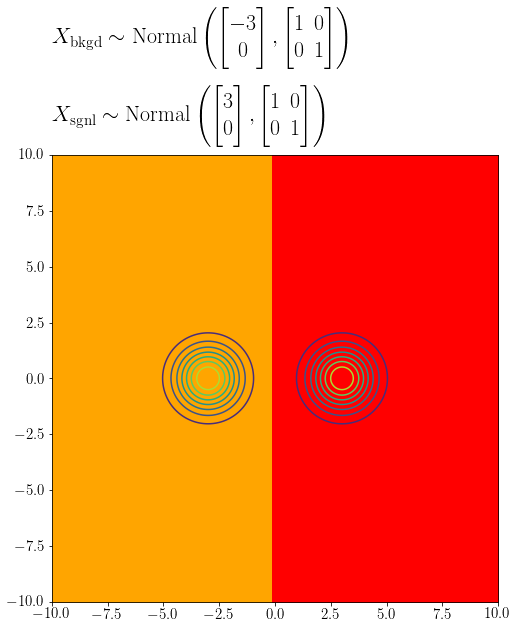

In [4]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')
plt.text(-10, 15, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -3 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.text(-10, 11.5, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 3 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.savefig('mvn_1.png', dpi = 300, transparent = True, bbox_inches = 'tight')

In [5]:
bkgd = stats.multivariate_normal([-2, 2], [[4, 0], [0, 4]])
sgnl = stats.multivariate_normal([2, -2], [[4, 0], [0, 4]])

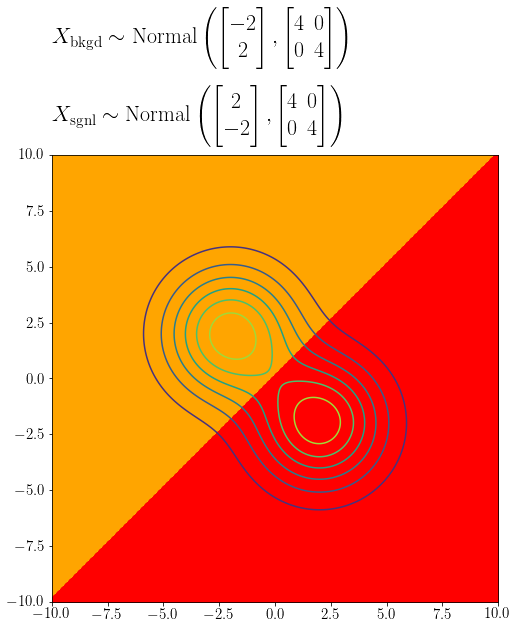

In [6]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')
plt.text(-10, 15, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -2 \\ 2 \end{bmatrix}, \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix} \right)$');
plt.text(-10, 11.5, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 2 \\ -2 \end{bmatrix}, \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix} \right)$');
plt.savefig('mvn_2.png', dpi = 300, transparent = True, bbox_inches = 'tight')

In [7]:
bkgd = stats.multivariate_normal([-3, 0], [[4, 0], [0, 4]])
sgnl = stats.multivariate_normal([3, 0], [[1, 0], [0, 1]])

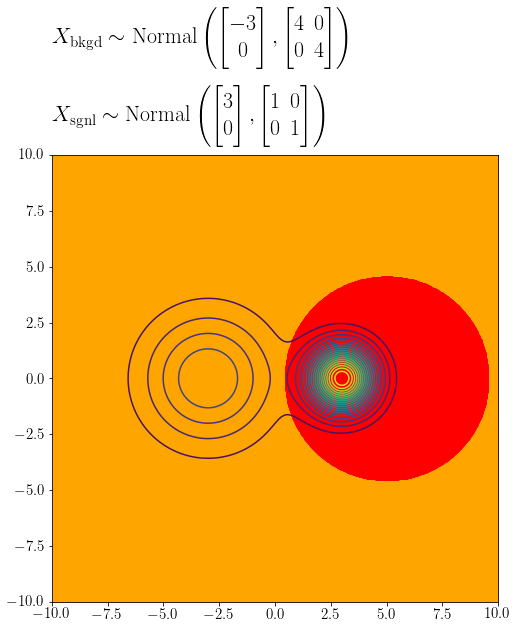

In [8]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), levels = 20)
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')
plt.text(-10, 15, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -3 \\ 0 \end{bmatrix}, \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix} \right)$');
plt.text(-10, 11.5, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 3 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.savefig('mvn_3.png', dpi = 300, transparent = True, bbox_inches = 'tight')

In [9]:
bkgd = stats.multivariate_normal([-3, 0], [[4, 0], [0, 1]])
sgnl = stats.multivariate_normal([3, 0], [[1, 0], [0, 4]])

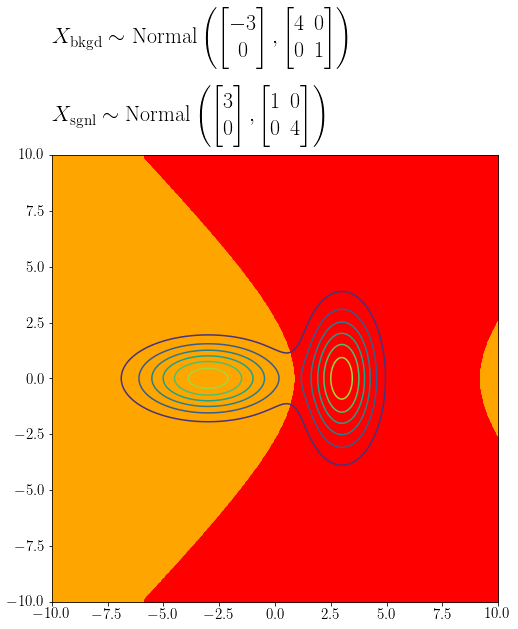

In [10]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')
plt.text(-10, 15, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -3 \\ 0 \end{bmatrix}, \begin{bmatrix} 4 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.text(-10, 11.5, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 3 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 4 \end{bmatrix} \right)$');
plt.savefig('mvn_4.png', dpi = 300, transparent = True, bbox_inches = 'tight')

In [11]:
bkgd = stats.multivariate_normal([-3, 0], [[4, 1], [1, 1]])
sgnl = stats.multivariate_normal([3, 0], [[4, -1], [-1, 1]])

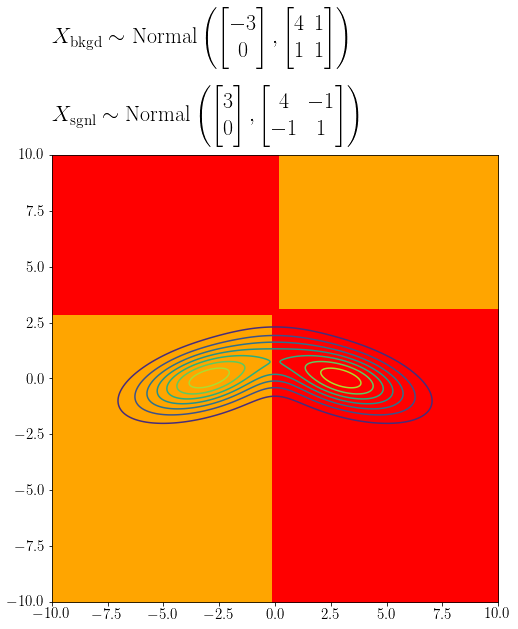

In [12]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')
plt.text(-10, 15, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -3 \\ 0 \end{bmatrix}, \begin{bmatrix} 4 & 1 \\ 1 & 1 \end{bmatrix} \right)$');
plt.text(-10, 11.5, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 3 \\ 0 \end{bmatrix}, \begin{bmatrix} 4 & -1 \\ -1 & 1 \end{bmatrix} \right)$');
plt.savefig('mvn_5.png', dpi = 300, transparent = True, bbox_inches = 'tight')

# Old

In [13]:
u = stats.multivariate_normal([-3, 0], [[4, 0], [0, 1]])
v = stats.multivariate_normal([3, 0], [[1, 0], [0, 4]])

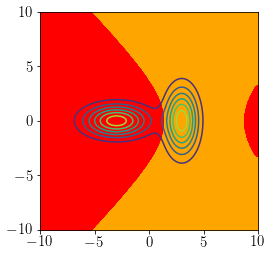

In [14]:
plt.contour(xx, yy, 0.5 * (u.pdf(pos) + v.pdf(pos)))
cc = pos[u.pdf(pos) / v.pdf(pos) < 1]
dd = pos[u.pdf(pos) / v.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
#ee = pos[(u.pdf(pos) / v.pdf(pos) <= 1.1) & (u.pdf(pos) / v.pdf(pos) >= 0.9)]
#plt.scatter(dd[:, 0], dd[:, 1], c = 'red', s = .01)
plt.gca().set_aspect('equal')